## NFL Fantasy Football Analysis

https://github.com/fantasydatapros/data

In [30]:
#%reset

# Analysis of the Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Import

In [32]:
#import data from github

#yearly data
year_2020 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')
year_2019 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv')
year_2018 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2018.csv')
year_2017 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2017.csv')
year_2016 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2016.csv')
year_2015 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2015.csv')

#snap count data
snap_2020 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2020.csv')
snap_2019 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2019.csv')
snap_2018 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2018.csv')
snap_2017 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2017.csv')
snap_2016 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2016.csv')
snap_2015 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/2015.csv')

### Data Cleaning - Before merge

In [33]:
#clean data
#year_2020.drop(columns=['Unnamed: 0'], inplace = True)
year_2019.drop(columns=['Unnamed: 0'], inplace = True)
year_2018.drop(columns=['Unnamed: 0'], inplace = True)
year_2017.drop(columns=['Unnamed: 0'], inplace = True)
year_2016.drop(columns=['Unnamed: 0'], inplace = True)
year_2015.drop(columns=['Unnamed: 0'], inplace = True)

#change heading in snaps for merging
snap_2020.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2019.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2018.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2017.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2016.rename (columns = {'Name': 'Player'}, inplace = True)
snap_2015.rename (columns = {'Name': 'Player'}, inplace = True)

## DataFrame Creation

### adds yearly column to each dataset

In [34]:
#lists for loops 
listYearly = [year_2020, year_2019, year_2018, year_2017, year_2016, year_2015]
years = [2020, 2019, 2018, 2017, 2016, 2015]

#function adds year col to data
def addYear(data, year):
    data.insert(0, 'Year', year)

#for yearly stats
for i in range(len(listYearly)):
    addYear(listYearly[i],years[i])

### sort by player name as index

In [35]:
#list for loops
listSnaps = [snap_2020, snap_2019, snap_2018, snap_2017, snap_2016, snap_2015]

#loop through to sort all df by player name
for i in range(len(years)):
    listYearly[i].set_index('Player', inplace = True)
    listSnaps[i].set_index('Player', inplace = True)
    listYearly[i] = listYearly[i][~listYearly[i].index.duplicated()]
    listSnaps[i] = listSnaps[i][~listSnaps[i].index.duplicated()]


In [36]:
# remove duplicate player names from these years
snap_2017 = snap_2017[~snap_2017.index.duplicated()]
snap_2016 = snap_2016[~snap_2016.index.duplicated()]
snap_2015 = snap_2015[~snap_2015.index.duplicated()]
year_2017 = year_2017[~year_2017.index.duplicated()]
year_2016 = year_2016[~year_2016.index.duplicated()]
year_2015 = year_2015[~year_2015.index.duplicated()]

### add snap count data to yearly data

In [37]:

#functions adds specific data from snaps to yearly
def addSnaps(data,snaps):
    data['Snaps'] = snaps['Snaps']
    data['TMSnaps'] = snaps['TeamSnaps']
    data['Snap%'] = snaps['Snap%']
    data['Rush%'] = snaps['RushPerc']
    data['Target%'] = snaps['TargetP']
    data['FPperSnap'] = snaps['FPPerSnap']

#call for each year
#for i in range(len(years)):
    #addSnaps(listYearly[i], snaps[i])

addSnaps(year_2020, snap_2020)
addSnaps(year_2019, snap_2019)
addSnaps(year_2018, snap_2018)

#unsolved error with 2017 - 2015
#cant merge the snap count data for some reason

addSnaps(year_2017, snap_2017)
addSnaps(year_2016, snap_2016)
addSnaps(year_2015, snap_2015)


### Create the dataset

In [38]:
#create dataframe and add years
yearly = year_2020
yearly = yearly.append(year_2019)
yearly = yearly.append(year_2018)
yearly = yearly.append(year_2017)
yearly = yearly.append(year_2016)
yearly = yearly.append(year_2015)

### Clean data - Post Merge

In [39]:
#reset player name back into the DF
yearly.reset_index(level=0, inplace=True)

#set int type to certain col
yearly = yearly.astype({'Age':int,'G':int,'GS':int,'Tgt':int,'Rec':int,'PassingTD':int,'PassingAtt':int,'RushingTD':int,'RushingAtt':int,'ReceivingTD':int, 'Int':int,'Fumbles':int,'FumblesLost':int})

#sort by fantasy points by default
yearly.sort_values(by = 'FantasyPoints' , axis = 0, ascending = False)

,Player,Year,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,FantasyPoints,Int,Fumbles,FumblesLost,Snaps,TMSnaps,Snap%,Rush%,Target%,FPperSnap
626,Christian McCaffrey,2019,CAR,RB,23,16,16,142,116,0.0,...,469.20,0,1,0,1056.0,1131.0,93.37,27.18,13.35,0.34
627,Lamar Jackson,2019,BAL,QB,22,15,15,0,0,3127.0,...,415.68,6,9,2,NaN,NaN,NaN,NaN,NaN,NaN
1250,Patrick Mahomes,2018,KAN,QB,23,16,16,0,0,5097.0,...,415.08,12,9,2,NaN,NaN,NaN,NaN,NaN,NaN
2438,David Johnson,2016,ARI,RB,25,16,16,120,80,0.0,...,405.80,0,5,3,964.0,1151.0,83.75,30.39,12.45,0.34
6,Josh Allen,2020,BUF,QB,24,16,16,1,1,4544.0,...,395.00,10,9,6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Kevin White,2020,SFO,NaN,28,3,0,0,0,0.0,...,NaN,0,0,0,9.0,194.0,4.64,0.00,0.00,0.00
614,Derrick Willies,2020,CLE,NaN,26,1,0,0,0,0.0,...,NaN,0,0,0,3.0,81.0,3.70,0.00,0.00,0.00
615,Duke Williams,2020,BUF,NaN,28,1,0,0,0,0.0,...,NaN,0,0,0,4.0,74.0,5.41,0.00,0.00,0.00
616,Caleb Wilson,2020,PHI,NaN,24,5,0,0,0,0.0,...,NaN,0,0,0,14.0,347.0,4.03,0.00,0.00,0.00


In [40]:
yearly[yearly['Year'] == 2018]

,Player,Year,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,FantasyPoints,Int,Fumbles,FumblesLost,Snaps,TMSnaps,Snap%,Rush%,Target%,FPperSnap
1246,Todd Gurley,2018,LAR,RB,24,14,14,81,59,0.0,...,366.10,0,1,1,825.0,959.0,86.03,31.03,9.82,0.38
1247,Saquon Barkley,2018,NYG,RB,21,16,16,121,91,0.0,...,383.80,0,0,0,854.0,1029.0,82.99,30.56,14.17,0.35
1248,Christian McCaffrey,2018,CAR,RB,22,16,16,124,107,50.0,...,385.50,0,4,1,965.0,1057.0,91.30,22.69,12.85,0.29
1249,Alvin Kamara,2018,NOR,RB,23,15,13,105,81,0.0,...,348.20,0,1,0,656.0,998.0,65.73,29.57,16.01,0.42
1250,Patrick Mahomes,2018,KAN,QB,23,16,16,0,0,5097.0,...,415.08,12,9,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,Kaelin Clay,2018,NYG,0,26,2,0,0,0,0.0,...,-2.00,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1864,JJ Jones,2018,2TM,WR,26,4,0,1,1,0.0,...,-0.70,0,2,1,5.0,195.0,2.56,20.00,20.00,-0.34
1865,Kyle Lauletta,2018,NYG,QB,23,2,0,0,0,0.0,...,-2.20,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1866,Riley McCarron,2018,NWE,0,25,1,0,1,0,0.0,...,-2.00,0,1,1,15.0,75.0,20.00,0.00,6.67,-0.13


### Split Dataset into positional sets

In [41]:
#Quarterbacks
byQB = yearly[yearly['Pos'] == 'QB']
byQB = byQB.drop(['Tgt', 'Rec', 'ReceivingYds','ReceivingTD','Snaps', 'TMSnaps','Snap%','Rush%','Target%'], axis = 1)

#Running Backs
byRB = yearly[yearly['Pos'] == 'RB']
byRB = byRB.drop(['PassingYds','PassingTD','PassingAtt','Int', 'Snaps','TMSnaps'], axis = 1)

#Wide Receivers
byWR = yearly[yearly['Pos'] == 'WR']
byWR = byWR.drop(['PassingYds','PassingTD','PassingAtt','Int', 'Snaps','TMSnaps'], axis = 1)

#Tight Ends
byTE = yearly[yearly['Pos'] == 'TE']
byTE = byTE.drop(['PassingYds','PassingTD','PassingAtt','Int', 'Snaps','TMSnaps','RushingAtt','RushingYds', 'RushingTD'], axis = 1)


## Dataset Exploration

### Intro to the Dataset

In [42]:
#total categories
print(list(yearly.head(0)))

['Player', 'Year', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Tgt', 'Rec', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints', 'Int', 'Fumbles', 'FumblesLost', 'Snaps', 'TMSnaps', 'Snap%', 'Rush%', 'Target%', 'FPperSnap']


In [43]:
#teams have all 32 teams with 2TM and 3TM if they switched teams during the season
yearly['Tm'].unique()

array(['TEN', 'NOR', 'MIN', 'KAN', 'GNB', 'BUF', 'ARI', 'HOU', 'IND',
       'LVR', 'CHI', 'SEA', 'JAX', 'ATL', 'CLE', 'TAM', 'LAC', 'BAL',
       'DAL', 'DEN', 'WAS', 'LAR', 'PIT', 'DET', 'CAR', 'MIA', 'PHI',
       'CIN', 'NWE', 'NYG', 'NYJ', 'SFO', '2TM', 'OAK', '3TM', 'SDG',
       'STL'], dtype=object)

In [44]:
#there are 5 positions, nan indicates unknown data or multiple positions
yearly['Pos'].unique()

array(['RB', 'TE', 'WR', 'QB', nan, '0'], dtype=object)

# Exploratory Data Analysis

In [45]:
byRB[byRB['Snap%'] > 70].sort_values(by = 'Snap%' , axis = 0, ascending = False)

,Player,Year,Tm,Pos,Age,G,GS,Tgt,Rec,RushingYds,...,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Fumbles,FumblesLost,Snap%,Rush%,Target%,FPperSnap
2443,Le'Veon Bell,2016,PIT,RB,24,12,12,94,75,1268.0,...,261,616.0,2,315.4,4,1,96.42,33.42,12.04,0.31
626,Christian McCaffrey,2019,CAR,RB,23,16,16,142,116,1387.0,...,287,1005.0,4,469.2,1,0,93.37,27.18,13.35,0.34
1248,Christian McCaffrey,2018,CAR,RB,22,16,16,124,107,1098.0,...,219,867.0,6,385.5,4,1,91.30,22.69,12.85,0.29
1869,Le'Veon Bell,2017,PIT,RB,25,15,15,106,85,1291.0,...,321,655.0,2,341.6,3,2,90.09,33.97,11.22,0.27
1252,Ezekiel Elliott,2018,DAL,RB,23,15,15,95,77,1434.0,...,304,567.0,3,329.1,6,1,89.21,34.04,10.64,0.28
654,Leonard Fournette,2019,JAX,RB,24,15,15,100,76,1152.0,...,265,522.0,0,259.4,1,1,88.35,28.87,10.89,0.20
1246,Todd Gurley,2018,LAR,RB,24,14,14,81,59,1251.0,...,256,580.0,4,366.1,1,1,86.03,31.03,9.82,0.38
1885,Ezekiel Elliott,2017,DAL,RB,22,10,10,38,26,983.0,...,242,269.0,2,203.2,1,1,85.53,40.95,6.43,0.30
2438,David Johnson,2016,ARI,RB,25,16,16,120,80,1239.0,...,293,879.0,4,405.8,5,3,83.75,30.39,12.45,0.34
646,Saquon Barkley,2019,NYG,RB,22,13,13,73,52,1003.0,...,217,438.0,2,244.1,1,0,83.37,29.44,9.91,0.26


In [46]:
#function to sort fantasy points by year and pos
def sort_ByYear_byPos(year, position):
    byYear = yearly.sort_values(by = 'Year' , axis=0, ascending=False)
    byYear = byYear[byYear['Year'] == year]
    byYear = byYear[byYear['Pos'] == position]
    byYear = byYear.sort_values(['FantasyPoints'], axis=0, ascending=False)
    return byYear.head(20)

In [47]:
sort_ByYear_byPos(2020, 'RB')

,Player,Year,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,FantasyPoints,Int,Fumbles,FumblesLost,Snaps,TMSnaps,Snap%,Rush%,Target%,FPperSnap
0,Derrick Henry,2020,TEN,RB,26,16,16,31,19,0.0,...,314.0,0,3,2,746.0,1123.0,66.43,53.08,4.56,0.43
1,Alvin Kamara,2020,NOR,RB,25,15,10,107,83,0.0,...,295.0,0,1,0,773.0,1161.0,66.58,29.50,14.88,0.42
2,Dalvin Cook,2020,MIN,RB,25,14,14,54,44,0.0,...,294.0,0,5,3,669.0,946.0,70.72,46.64,8.07,0.44
11,Jonathan Taylor,2020,IND,RB,21,15,13,39,36,0.0,...,217.0,0,1,1,559.0,1096.0,51.00,45.26,8.05,0.41
12,Aaron Jones,2020,GNB,RB,26,14,14,63,47,0.0,...,212.0,0,2,0,608.0,1049.0,57.96,36.35,11.68,0.38
14,David Montgomery,2020,CHI,RB,23,15,14,68,54,0.0,...,211.0,0,1,1,796.0,1071.0,74.32,32.54,8.67,0.27
17,James Robinson,2020,JAX,RB,22,14,14,60,49,0.0,...,201.0,0,3,1,641.0,917.0,69.90,37.44,9.36,0.31
18,Josh Jacobs,2020,LVR,RB,22,15,15,45,33,0.0,...,198.0,0,2,2,616.0,1004.0,61.35,44.32,7.31,0.32
21,Nick Chubb,2020,CLE,RB,25,12,12,18,16,0.0,...,192.0,0,1,1,482.0,961.0,50.16,45.85,5.60,0.46
30,Kareem Hunt,2020,CLE,RB,25,16,5,51,38,0.0,...,181.0,0,2,0,606.0,1192.0,50.84,34.98,8.75,0.34


In [48]:
#function takes p[ayer name and displays yearly stats
def sort_By_Player(playerName):
    #user input for plots or not
    yearly[yearly['Player'] == playerName]
    plot = input("Would you like to display graphs? (yes/no)")
    #plot info
    if plot == 'yes':
        plt.plot(yearly[yearly['Player'] == playerName]['Year'], yearly[yearly['Player'] == playerName]['FantasyPoints']);
        plt.xticks(np.arange(min(yearly[yearly['Player'] == playerName]['Year']), max(yearly[yearly['Player'] == playerName]['Year'])+1, 1.0))
        plt.xlabel('Years')
        plt.ylabel('Fantasy points')
        plt.title(playerName + "'s fantasy points per year")
        plt.show()
    #return the df
    return yearly[yearly['Player'] == playerName].sort_values(by = 'FantasyPoints' , axis = 0, ascending = False)

Would you like to display graphs? (yes/no)yes


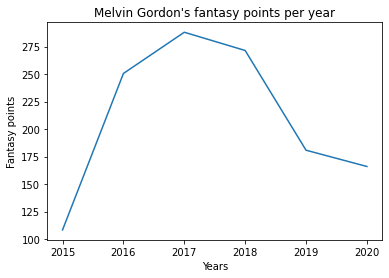

,Player,Year,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,FantasyPoints,Int,Fumbles,FumblesLost,Snaps,TMSnaps,Snap%,Rush%,Target%,FPperSnap
1872,Melvin Gordon,2017,LAC,RB,24,16,16,83,58,0.0,...,288.1,0,1,0,750.0,1064.0,70.49,37.87,11.07,0.31
1258,Melvin Gordon,2018,LAC,RB,25,12,12,66,50,0.0,...,271.5,0,1,0,525.0,758.0,69.26,33.33,12.57,0.43
2450,Melvin Gordon,2016,SDG,RB,23,13,11,57,41,0.0,...,250.6,0,2,2,661.0,880.0,75.11,38.43,8.62,0.32
722,Melvin Gordon,2019,LAC,RB,26,12,11,55,42,0.0,...,180.8,0,4,3,433.0,798.0,54.26,37.41,12.70,0.32
35,Melvin Gordon,2020,DEN,RB,27,15,10,44,32,0.0,...,166.0,0,4,4,NaN,NaN,NaN,NaN,NaN,NaN
3184,Melvin Gordon,2015,SDG,RB,22,14,13,37,33,0.0,...,108.3,0,6,4,396.0,1023.0,38.71,46.46,9.34,0.19


In [49]:
sort_By_Player('Melvin Gordon')

## How Volatile are the Top End Wide Recievers?

In [50]:
# creating a list of dataframes for each year, with wide recievers
WR_yearly = []
for i in range(2015, 2021):
    WR_yearly.append(byWR[byWR['Year'] == i])
    WR_yearly[i-2015] = WR_yearly[i-2015].sort_values('FantasyPoints',ascending=False)

# make a dataframe that groups players by name and year. (since all are unique, nothing actually gets summed)
WR_all_years = pd.concat([WR_yearly[0],WR_yearly[1],WR_yearly[2],WR_yearly[3],WR_yearly[4],WR_yearly[5]],
                         ignore_index=True)
WR_all_years = WR_all_years.groupby(['Player','Year']).sum()


<AxesSubplot:title={'center':'Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2015'}, xlabel='Player', ylabel='Fantasy Points'>

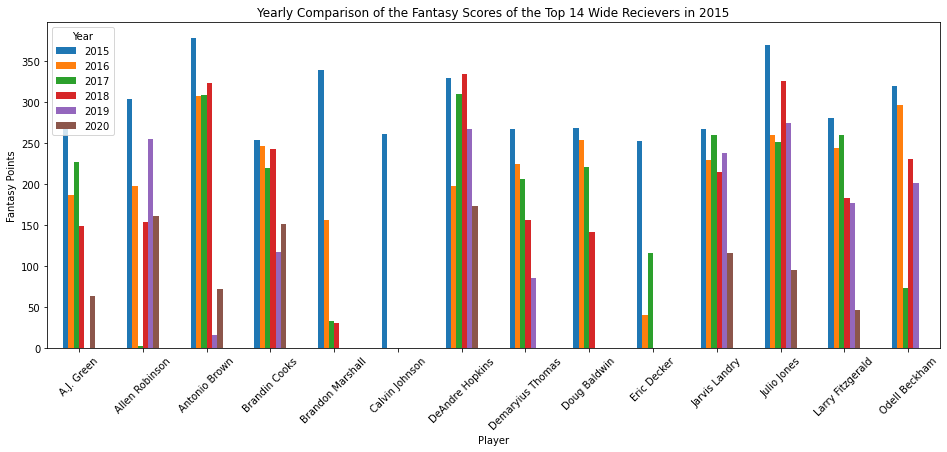

In [51]:
# find top 14 wide receivers of 2015
top_WR_2015 = WR_yearly[0][:14].Player
top_WR_2015 = WR_all_years.loc[top_WR_2015]

# create a pivot table to store the top 14 players' scores throughout 2015-2020
WR_2015_pivot = pd.pivot_table(top_WR_2015, values='FantasyPoints',index='Player', columns=['Year'])
WR_2015_pivot.plot(kind='bar',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2015")

<AxesSubplot:title={'center':'Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2016'}, xlabel='Player', ylabel='Fantasy Points'>

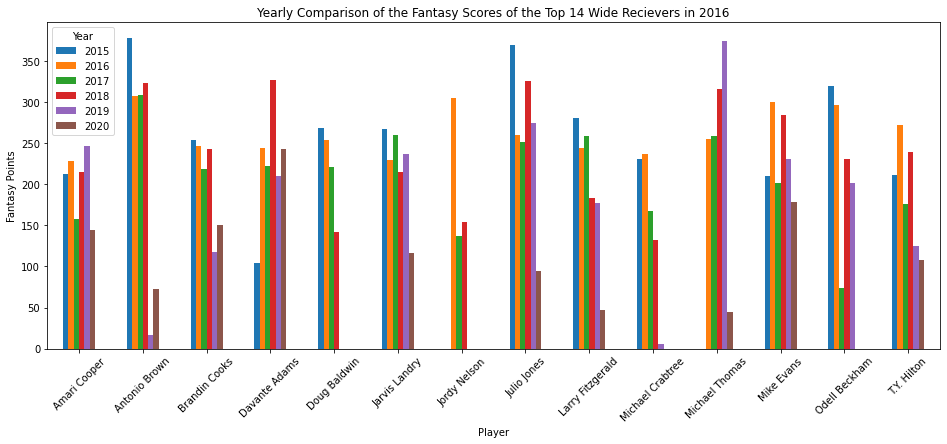

In [52]:
# find top 14 wide receivers of 2016
top_WR_2016 = WR_yearly[1][:14].Player
top_WR_2016 = WR_all_years.loc[top_WR_2016]

# create a pivot table to store the 2016 top 14 players' scores throughout 2015-2020
WR_2016_pivot = pd.pivot_table(top_WR_2016, values='FantasyPoints',index='Player', columns=['Year'])
WR_2016_pivot.plot(kind='bar',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2016")

<AxesSubplot:title={'center':'Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2017'}, xlabel='Player', ylabel='Fantasy Points'>

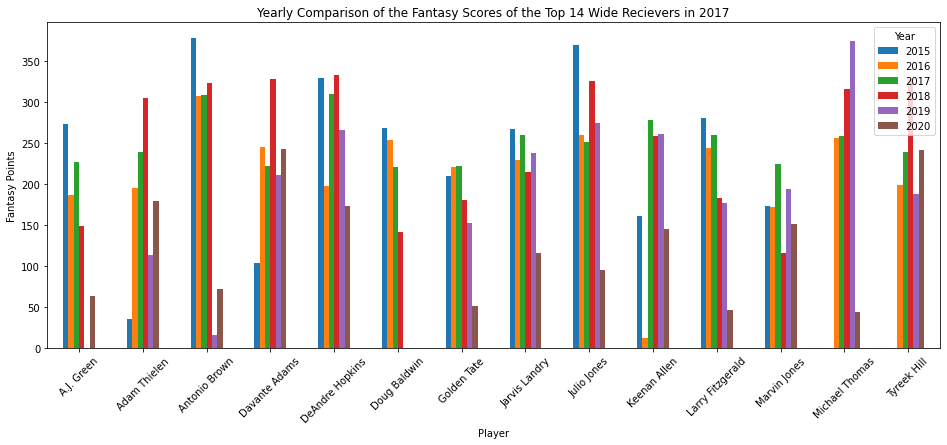

In [53]:
# find top 14 wide receivers of 2017
top_WR_2017 = WR_yearly[2][:14].Player
top_WR_2017 = WR_all_years.loc[top_WR_2017]

# create a pivot table to store the 2017 top 14 players' scores throughout 2015-2020
WR_2017_pivot = pd.pivot_table(top_WR_2017, values='FantasyPoints',index='Player', columns=['Year'])
WR_2017_pivot.plot(kind='bar',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2017")

<AxesSubplot:title={'center':'Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2018'}, xlabel='Player', ylabel='Fantasy Points'>

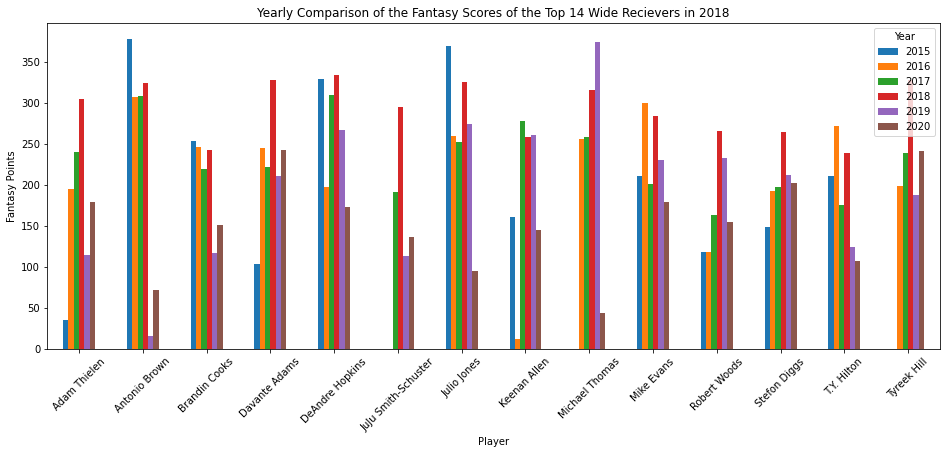

In [54]:
# find top 14 wide receivers of 2018
top_WR_2018 = WR_yearly[3][:14].Player
top_WR_2018 = WR_all_years.loc[top_WR_2018]

# create a pivot table to store the 2018 top 14 players' scores throughout 2015-2020
WR_2018_pivot = pd.pivot_table(top_WR_2018, values='FantasyPoints',index='Player', columns=['Year'])
WR_2018_pivot.plot(kind='bar',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2018")

<AxesSubplot:title={'center':'Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2019'}, xlabel='Player', ylabel='Fantasy Points'>

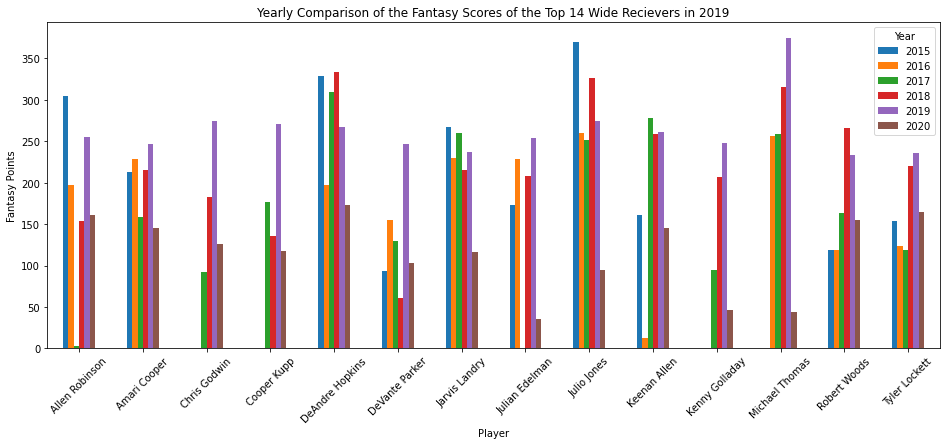

In [55]:
# find top 14 wide receivers of 2019
top_WR_2019 = WR_yearly[4][:14].Player
top_WR_2019 = WR_all_years.loc[top_WR_2019]

# create a pivot table to store the 2019 top 14 players' scores throughout 2015-2020
WR_2019_pivot = pd.pivot_table(top_WR_2019, values='FantasyPoints',index='Player', columns=['Year'])
WR_2019_pivot.plot(kind='bar',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2019")

<AxesSubplot:title={'center':'Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2020'}, xlabel='Player', ylabel='Fantasy Points'>

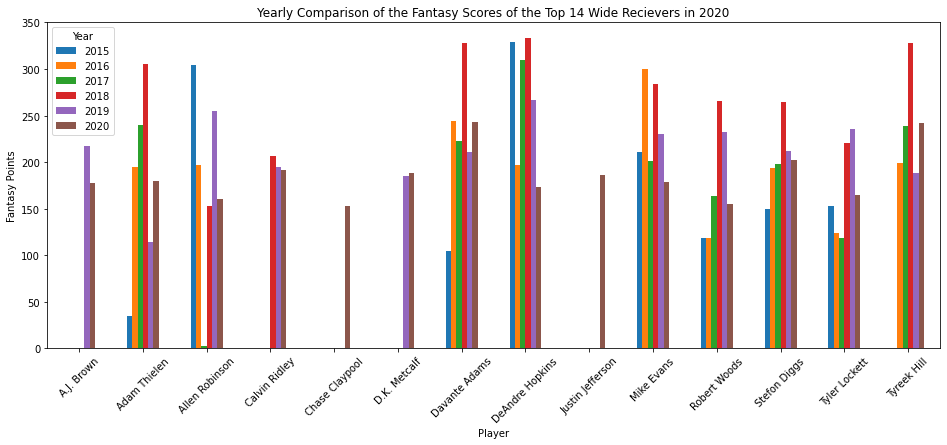

In [56]:
# find top 14 wide receivers of 2020
top_WR_2020 = WR_yearly[5][:14].Player
top_WR_2020 = WR_all_years.loc[top_WR_2020]

# create a pivot table to store the 2020 top 14 players' scores throughout 2015-2020
WR_2020_pivot = pd.pivot_table(top_WR_2020, values='FantasyPoints',index='Player', columns=['Year'])
WR_2020_pivot.plot(kind='bar',figsize=(16,6),ylabel="Fantasy Points", rot=45, title="Yearly Comparison of the Fantasy Scores of the Top 14 Wide Recievers in 2020")

<AxesSubplot:title={'center':'Standard Deviation of the Fantasy Scores of the Top Wide Receivers From 2015 - 2020'}, xlabel='Player', ylabel='Standard Deviation (Fantasy Points)'>

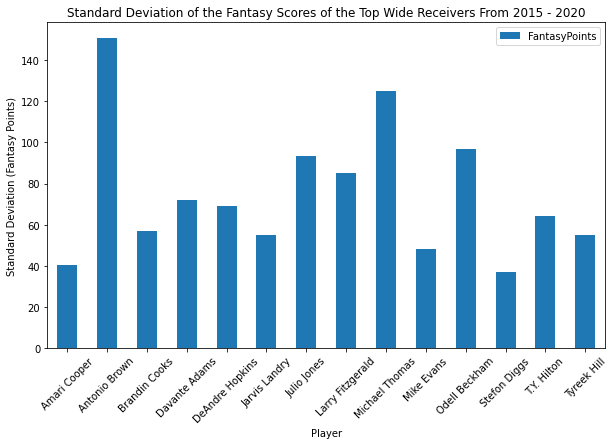

In [57]:
# find top 14 players from 2015 - 2020 (based on sum of points)
top_WR_all = WR_all_years.reset_index(level='Year')
top_WR = top_WR_all.groupby('Player').sum().FantasyPoints.sort_values(ascending=False)[:14].index
top_WR = top_WR_all.loc[top_WR]
# find the std of the values from year to year
top_WR_std = top_WR.groupby('Player').std()
# put the std of the fantasy scores into a pivot table, then plot
top_WR_std = pd.pivot_table(top_WR_std, values='FantasyPoints',index='Player')
top_WR_std.plot(kind='bar', figsize=(10,6), ylabel="Standard Deviation (Fantasy Points)",
                      title="Standard Deviation of the Fantasy Scores of the Top Wide Receivers From 2015 - 2020",
                rot=45)

### Description of Findings for how Volatile the Top End Wide Receivers Are